# COVID mortality rates per country

This is a naive analysis of the published  mortality rates for the COVID 19 pandemic.

- pull the data from a csv on github
- turn it into a Pandas DataFrame
- do some filtering and a couple of plots

I believe that **everyone** should be able to do this.
Doing basic data analysis should be  like  what reading and writing
was at the beginning of the 20th century - a basic skill 
taught to every child at school.

The data is published [here](https://github.com/CSSEGISandData/COVID-19)

**2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE**

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). 




In [2]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the latest time series and save to disk

In [3]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)



# Parse them to a DataFrames

In [4]:
df = pd.read_csv('covid_deaths.csv')
dfc = pd.read_csv('covid_confirmed.csv')

In [186]:
dfc[140:145]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
140,NaN,Jordan,31.2400,36.5100,0,0,0,0,0,0,...,154,172,212,235,246,259,268,274,278,299
141,NaN,Kazakhstan,48.0196,66.9237,0,0,0,0,0,0,...,72,81,111,150,228,284,302,343,380,435
142,NaN,Kenya,-0.0236,37.9062,0,0,0,0,0,0,...,25,28,31,31,38,42,50,59,81,110
143,NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,...,9037,9137,9241,9332,9478,9583,9661,9786,9887,9976
144,NaN,Kuwait,29.5000,47.7500,0,0,0,0,0,0,...,191,195,208,225,235,255,266,289,317,342


In [77]:
df[df["Country/Region"] == 'South Korea']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20


# Foyers

These are the hotspots for the pandemic
- I chose 300 because I can catch Germany like that

In [55]:
foyers = df[df[df.columns[-1]] > 300]
foyers.sort_values(by=foyers.columns[-1], 
                   ascending=False).iloc[:10,[1,-1]]

,Country/Region,4/7/20
137,Italy,17127
201,Spain,14045
225,US,12722
116,France,10328
223,United Kingdom,6159
133,Iran,3872
62,China,3212
169,Netherlands,2101
23,Belgium,2035
120,Germany,2016


Text(0,0.5,'log(deaths)')

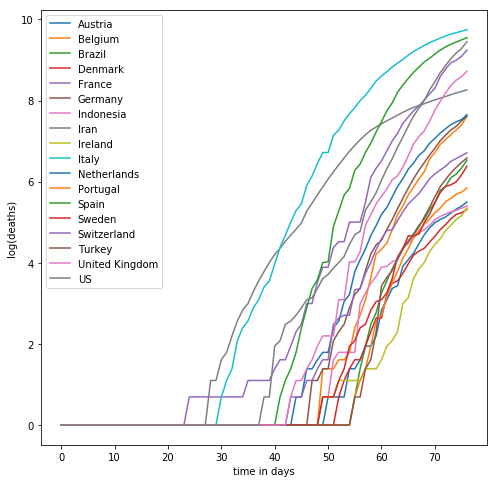

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

for x in foyers.index:
    if df.iloc[x]["Country/Region"] in ['China']: continue
    Y = np.log( df.iloc[x].values[4:].astype(np.float) + 1)
    ax.plot(np.arange(len(Y)),Y, label=df.iloc[x]["Country/Region"])

#ax.axis('equal')
leg = ax.legend()
plt.xlabel('time in days')
plt.ylabel('log(deaths)')

so the graph shows log(deaths) 

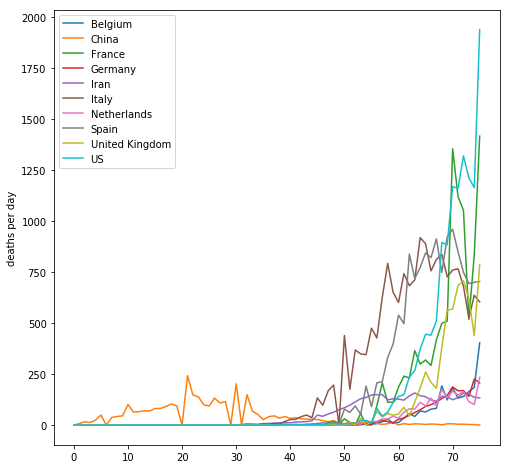

In [7]:
sss = df[df[df.columns[-1]] > 2000]
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in sss.index:
    x = df.iloc[k,4:].values
    x[1:] - x[:-1]
    ax.plot(x[1:] - x[:-1], label=df.iloc[k]["Country/Region"])
    
leg = ax.legend()
plt.ylabel('deaths per day')
plt.savefig('dd.png')

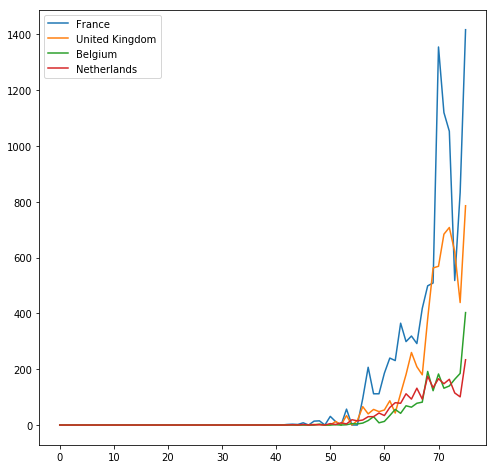

In [59]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
for k in [116,223,23,169]:
    x = df.iloc[k,4:].values
    Y = x[1:] - x[:-1]
    #X = [(k + 6) % 7 for k in range(len(Y))]
    ax.plot(Y,label=df.iloc[k]["Country/Region"])
    
leg = ax.legend()

## per day deaths

In [44]:
day_by_day = np.diff(df.iloc[:,4:], axis=1)
for k in [116,120,201,137,223,225]:
    print(df.iloc[k,1].ljust(15), day_by_day[k,-7:] )

France          [ 509 1355 1120 1053  518  833 1417]
Germany         [145 187 168 169 140 226 206]
Spain           [923 961 850 749 694 700 704]
Italy           [727 760 766 681 525 636 604]
United Kingdom  [563 569 684 708 621 439 786]
US              [ 884 1169 1161 1320 1212 1164 1939]


# Linear regression

If a quantity is growing/decaying exponentially 
then by taking logs we should get a straignt line....

We can calculate the best fit straight line 
to the data by doing linear regression.



In [10]:
from scipy import stats


def lin_reg(mdf, indices, window = 10):
    X = []
    for c in indices:
        Y = mdf.iloc[c].values[ -window:].astype(np.float)
        # apply a cut off
        Y = np.log(Y[Y > 100])
        vv = stats.linregress(np.arange(len(Y)), Y)
        X.append((c, np.exp(vv.slope), np.exp(vv.intercept).astype(int) ))
    return X

## these are the results

In [11]:
ww = 10
cc = countries = [x for x in foyers.index if x != 62]

X = list(zip(* lin_reg(df,cc,window=ww)))
Z = list(zip(* lin_reg(dfc,cc,window=ww)))

X[2] = Z[1]
X[0] = [dfc.iloc[x]["Country/Region"] for x in X[0]]
dff = pd.DataFrame({'country' : X[0], 'deaths': X[1], 'confirmed': X[2]})
dff

,country,deaths,confirmed
0,Austria,1.099672,1.038006
1,Belgium,1.178515,1.084939
2,Brazil,1.197917,1.144519
3,Denmark,1.116964,1.088336
4,France,1.171963,1.121010
5,Germany,1.158416,1.064839
6,Indonesia,1.077099,1.085423
7,Iran,1.043939,1.055527
8,Ireland,1.145488,1.091536
9,Italy,1.052200,1.038226


# Calculate days till herd immunity achieved

- The population is roughly $67 \times 10^6$.
- dfc holds the stats for confirmed cases
- dff holds the growth rates

So we need to do something like
$$\frac{1}{ \text{growth rate}} \times
\log \left( .6 \times \frac{\text{Population}}{\text{# infected total}} 
\right)
$$

When I think about it whether it's .6 or .4 makes hardly any difference
because we are taking logs and the difference is less than 1/2.

In [263]:
np.log( dff.iloc[2,2])   + np.log( dff.iloc[2,1]) ,  dfc.iloc[116, -1]

(0.3328460515569509, 92839)

In [290]:
np.log(20)/np.log(1.11)

28.705747735340562

In [265]:
np.log(.6*67*10**6/ 10/ dfc.iloc[116, -1]) /.14,  dfc.iloc[116, -1]

(26.915502653458155, 92839)

Text(0,0.5,'confirmed cases growth rate')

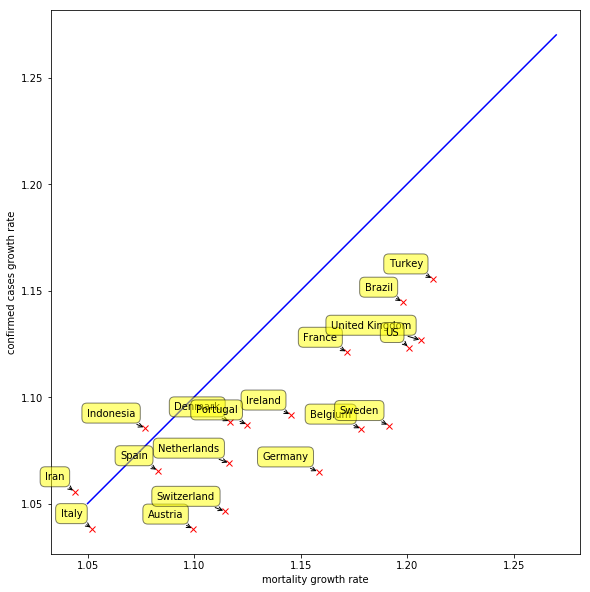

In [12]:
labels = dfc.iloc[cc]["Country/Region"]

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
for label, x, y in zip(dff['country'], dff['deaths'],dff['confirmed']):
    ax.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

ax.plot(dff['deaths'],dff['confirmed'],'rx')
ax.set_aspect('equal')
bx = [1.05,1.27]
plt.plot(bx,bx,'b')
plt.xlabel('mortality growth rate')
plt.ylabel('confirmed cases growth rate')

## Calculate rolling averages for some countries for the last 36 days


this was something somebody asked me to do for another problem
but it's a standard way of smoothing data.

In [71]:
df.iloc[cc,-1]

23       513
116     3024
120      645
133     2757
137    11591
169      864
201     7716
206      359
223     1408
225     2978
Name: 3/30/20, dtype: int64

In [51]:
start = -30
data = [df.iloc[nn , start:].rolling(4).sum() for nn in cc ]
filtered_data = [ x[x>2000].values for x in data]

## should really pad the filtered_data so that it's for the same period

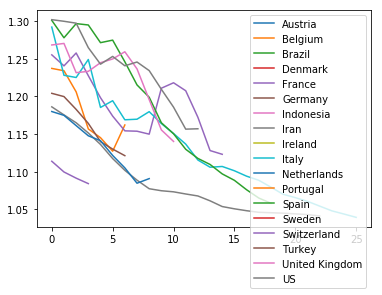

In [53]:
fig, ax = plt.subplots()
for x,label in zip(filtered_data, df.iloc[cc]["Country/Region"]):
    ax.plot( x[1:]/x[:-1], label=label)

leg = ax.legend();

# rolling sums for math

In [87]:
filtered_data[1]

array([  119.,   148.,   208.,   266.,   309.,   409.,   478.,   535.,
         687.,   989.,  1403.,  1929.,  2546.,  3196.,  3965.,  4987.,
        6122.,  7336.,  8611.,  9939., 11467.])

In [103]:
np.log(.6*67*10**6/52128)/np.log(1.11)

63.701792506762544

In [96]:
dfc.iloc[116,-1]

52128

In [152]:
np.exp(np.log(1250)/23)

1.3634783972515458

In [183]:
'Reidemeister'.lower()[:10]

'reidemeist'